In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('heart_attack_data.csv')

In [16]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [17]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [18]:
# changing values in gender, if value is 1 then male, else female

df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [19]:
df['Gender'].value_counts()

Gender
Male      870
Female    449
Name: count, dtype: int64

In [20]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,Male,66,160,83,160.0,1.80,0.012,negative
1,21,Male,94,98,46,296.0,6.75,1.060,positive
2,55,Male,64,160,77,270.0,1.99,0.003,negative
3,64,Male,70,120,55,270.0,13.87,0.122,positive
4,55,Male,64,112,65,300.0,1.08,0.003,negative


In [21]:
# Addressing potential outliers in 'Heart rate' and 'CK-MB' using the IQR method

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

df['Heart rate'] = cap_outliers(df['Heart rate'])
df['CK-MB'] = cap_outliers(df['CK-MB'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   float64
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 92.9+ KB


In [23]:
df.describe()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,75.931766,127.170584,72.269143,146.634344,4.463456,0.360942
std,13.647315,14.807730,26.122720,14.033924,74.923045,3.825702,1.154568
min,14.000000,32.500000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,116.500000,223.000000,154.000000,541.000000,12.030000,10.300000


In [24]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [25]:
# Create age groups (e.g., <30, 30-40, 41-50, 51-60, >60) for better visualization.

def categorize_age(age):
    if age < 30:
        return '<30'
    elif age <= 40:
        return '30-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '>60'

df['Age Group'] = df['Age'].apply(categorize_age)

df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age Group
0,64,Male,66.0,160,83,160.0,1.80,0.012,negative,>60
1,21,Male,94.0,98,46,296.0,6.75,1.060,positive,<30
2,55,Male,64.0,160,77,270.0,1.99,0.003,negative,51-60
3,64,Male,70.0,120,55,270.0,12.03,0.122,positive,>60
4,55,Male,64.0,112,65,300.0,1.08,0.003,negative,51-60


In [26]:
df['Age Group'].value_counts()

Age Group
>60      514
51-60    354
41-50    275
30-40    123
<30       53
Name: count, dtype: int64

C:\Users\KOJO\AppData\Local\Temp\ipykernel_16468\2953243709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette='Set2')


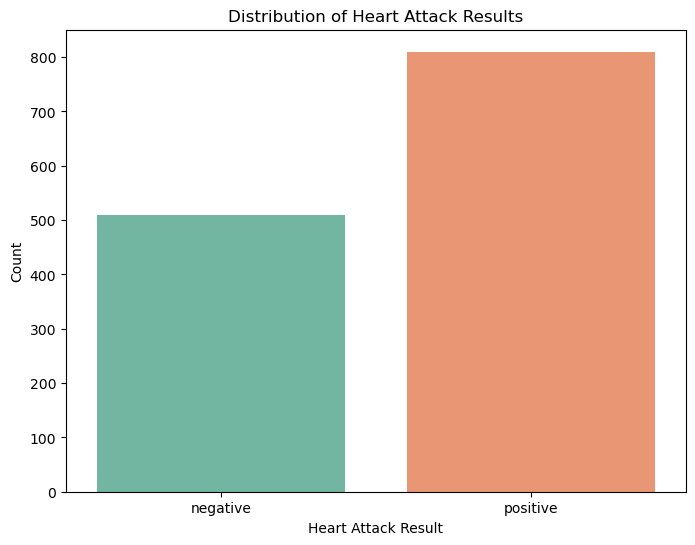

In [27]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df, palette='Set2')
plt.title('Distribution of Heart Attack Results')
plt.xlabel('Heart Attack Result')
plt.ylabel('Count')
plt.show()

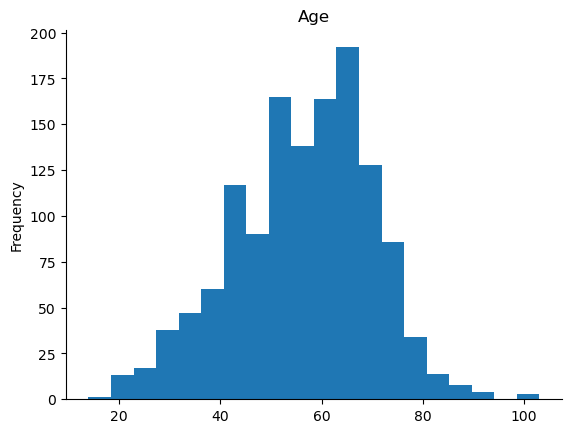

In [28]:
# Age distribution Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

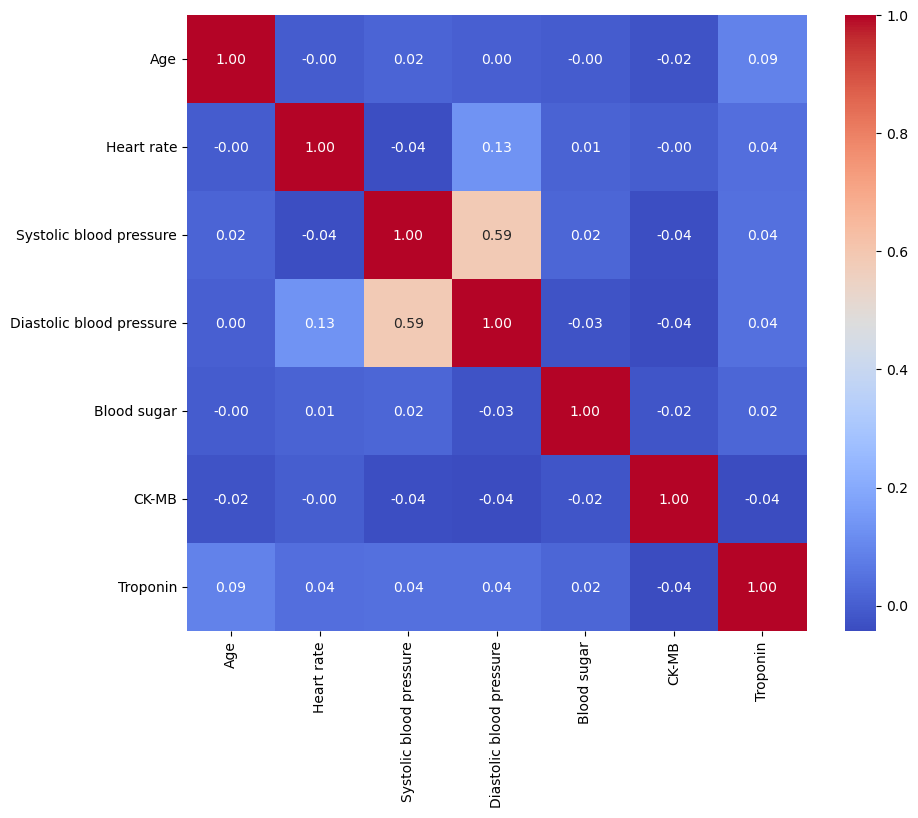

In [29]:
# HEAT MAP FOR CORRELATIONS

# selecting columns that are numbers
num_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")



**DATA PREPROCESSING PHASE**

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_for_logReg(data, target_column, categorical_columns, test_size=0.2, random_state=42):
    """
    Preprocess data for logistic regression: encode categorical variables, split data, and standardize features.
    Also encodes the target column using LabelEncoder.

    Returns:
    - X_train, X_test, y_train, y_test, preprocessor, le
    """
    # Encode the target column
    le = LabelEncoder()
    y = le.fit_transform(data[target_column])

    # Split features and target
    X = data.drop(columns=[target_column])

    # Identify numerical columns
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
            ('num', StandardScaler(), numerical_columns)
        ])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Apply encoding and standardization
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test, preprocessor, le

# calling the function
X_train, X_test, y_train, y_test, preprocessor, le = preprocess_for_logReg(
    df, 'Result', ['Gender', 'Age Group']
)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1055, 12)
(264, 12)
(1055,)
(264,)


In [49]:
pd.Series(y_train).value_counts()

1    647
0    408
Name: count, dtype: int64

TRAINING THE MODEL WITH LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate the best Logistic Regression model
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
print("Best Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)

Accuracy: 0.803030303030303

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264

Best Logistic Regression Confusion Matrix:
 [[ 71  30]
 [ 22 141]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Train Logistic Regression with best parameters from RandomizedSearchCV
best_logreg = LogisticRegression(**logreg_search.best_params_, random_state=42)
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)

print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_logreg))
print("\nBest Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_logreg))

# Evaluate the best Logistic Regression model
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
print("Best Logistic Regression Confusion Matrix:\n", conf_matrix_best_logreg)

Best Logistic Regression Accuracy: 0.9166666666666666

Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       101
           1       0.93      0.94      0.93       163

    accuracy                           0.92       264
   macro avg       0.91      0.91      0.91       264
weighted avg       0.92      0.92      0.92       264

Best Logistic Regression Confusion Matrix:
 [[ 89  12]
 [ 10 153]]


Lets train the model with XGBOOST TOO

In [40]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(
    y_test, xgb_pred, target_names=[str(cls) for cls in le.classes_]))


# Evaluate the XGBoost model
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)

XGBoost Accuracy: 0.9810606060606061

XGBoost Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

XGBoost Confusion Matrix:
 [[ 98   3]
 [  2 161]]


In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Define StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV for XGBoost
xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    xgb_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
xgb_search.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_search.best_params_)
print("Best CV Score (XGBoost):", xgb_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best CV Score (XGBoost): 0.9876777251184834


In [46]:
# Train the best XGBoost model and evaluate it (without use_label_encoder parameter)
best_xgb = XGBClassifier(**xgb_search.best_params_, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Best XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("\nBest XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb, target_names=list(map(str, le.classes_))))

# Evaluate the best XGBoost model
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
print("Best XGBoost Confusion Matrix:\n", conf_matrix_best_xgb)

Best XGBoost Accuracy: 0.9810606060606061

Best XGBoost Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Best XGBoost Confusion Matrix:
 [[ 98   3]
 [  2 161]]


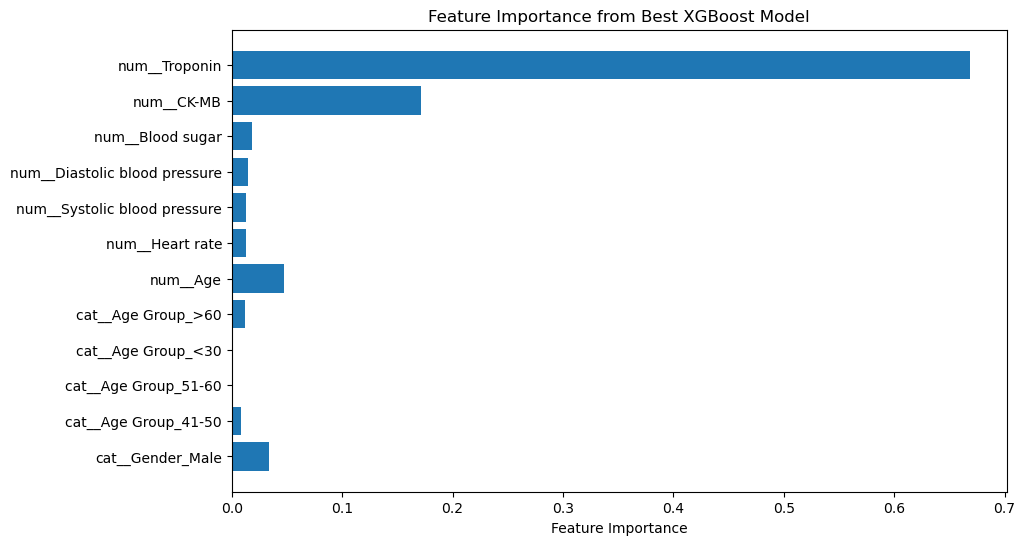

In [47]:
# Plotting feature importance for the best XGBoost model
plt.figure(figsize=(10, 6))
plt.barh(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_, align='center')
plt.yticks(range(len(best_xgb.feature_importances_)), preprocessor.get_feature_names_out())
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Best XGBoost Model')
plt.show()